In [42]:
# Imports 
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.objectives import MSE, MAE
from keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [43]:
# Get data
df1 = pandas.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pandas.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# Drop NaN
df.dropna(inplace=True)

# Select only relevant features (correlation to label > 0.1)
df_clean_relevant = df[['city','year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'total_cases']]

# Input output split
x = df_clean_relevant.drop(['city','year', 'weekofyear', 'total_cases'], axis=1)
y = df_clean_relevant['total_cases']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=1)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Quick look
X_train.shape

(1079, 12)

In [64]:
# Initialize
model = Sequential([
  Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dense(1),
])

# Compile
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.002))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train and log
train_log = model.fit(X_train, y_train.values, batch_size=256, epochs=200, validation_split=0.1, verbose=2, callbacks=[early_stopping])

Train on 971 samples, validate on 108 samples
Epoch 1/200
 - 1s - loss: 20.6636 - val_loss: 20.3753
Epoch 2/200
 - 0s - loss: 17.8526 - val_loss: 17.8498
Epoch 3/200
 - 0s - loss: 17.6635 - val_loss: 17.5688
Epoch 4/200
 - 0s - loss: 16.9485 - val_loss: 17.8189
Epoch 5/200
 - 0s - loss: 16.7295 - val_loss: 17.8205
Epoch 6/200
 - 0s - loss: 16.5899 - val_loss: 16.9526
Epoch 7/200
 - 0s - loss: 16.0903 - val_loss: 16.4771
Epoch 8/200
 - 0s - loss: 15.8515 - val_loss: 16.5532
Epoch 9/200
 - 0s - loss: 15.7430 - val_loss: 16.3807
Epoch 10/200
 - 0s - loss: 15.3995 - val_loss: 15.3230
Epoch 11/200
 - 0s - loss: 15.3370 - val_loss: 15.6724
Epoch 12/200
 - 0s - loss: 15.2481 - val_loss: 15.7463
Epoch 13/200
 - 0s - loss: 15.5343 - val_loss: 15.5589
Epoch 14/200
 - 0s - loss: 15.3694 - val_loss: 15.5904
Epoch 15/200
 - 0s - loss: 15.0022 - val_loss: 15.4035
Epoch 16/200
 - 0s - loss: 15.3937 - val_loss: 15.4247
Epoch 17/200
 - 0s - loss: 15.3634 - val_loss: 16.1262
Epoch 18/200
 - 0s - loss: 1

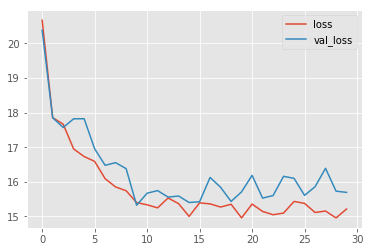

In [65]:
# Plot

import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [66]:
# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)

# Result
print('NNW Performance on the test set: MAE = %0.4f' % mae)

NNW Performance on the test set: MAE = 13.1662
